<a href="https://colab.research.google.com/github/Anastasiamay/Study_projects/blob/main/real_estate_ads.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Исследование объявлений о продаже квартир


### Откройте файл с данными и изучите общую информацию. 

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
! gdown --id 1yjkwD0Zrtwm8AhHipQaTnQxESO3eCTkV

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1yjkwD0Zrtwm8AhHipQaTnQxESO3eCTkV
To: /content/real_estate_data.csv
100% 3.21M/3.21M [00:00<00:00, 195MB/s]


In [ ]:
!pip install -q xlrd
data = pd.read_csv('real_estate_data.csv', sep='\t')
pd.set_option('display.max_columns', None)
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,False,False,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,False,False,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,False,False,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,False,False,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,False,False,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


Описание данных
* airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
* balcony — число балконов
* ceiling_height — высота потолков (м)
* cityCenters_nearest — расстояние до центра города (м)
* days_exposition — сколько дней было размещено объявление (от публикации до снятия)
* first_day_exposition — дата публикации
* floor — этаж
* floors_total — всего этажей в доме
* is_apartment — апартаменты (булев тип)
* kitchen_area — площадь кухни в квадратных метрах (м²)
* last_price — цена на момент снятия с публикации
* living_area — жилая площадь в квадратных метрах (м²)
* locality_name — название населённого пункта
* open_plan — свободная планировка (булев тип)
* parks_around3000 — число парков в радиусе 3 км
* parks_nearest — расстояние до ближайшего парка (м)
* ponds_around3000 — число водоёмов в радиусе 3 км
* ponds_nearest — расстояние до ближайшего водоёма (м)
* rooms — число комнат
* studio — квартира-студия (булев тип)
* total_area — общая площадь квартиры в квадратных метрах (м²)
* total_images — число фотографий квартиры в объявлении

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

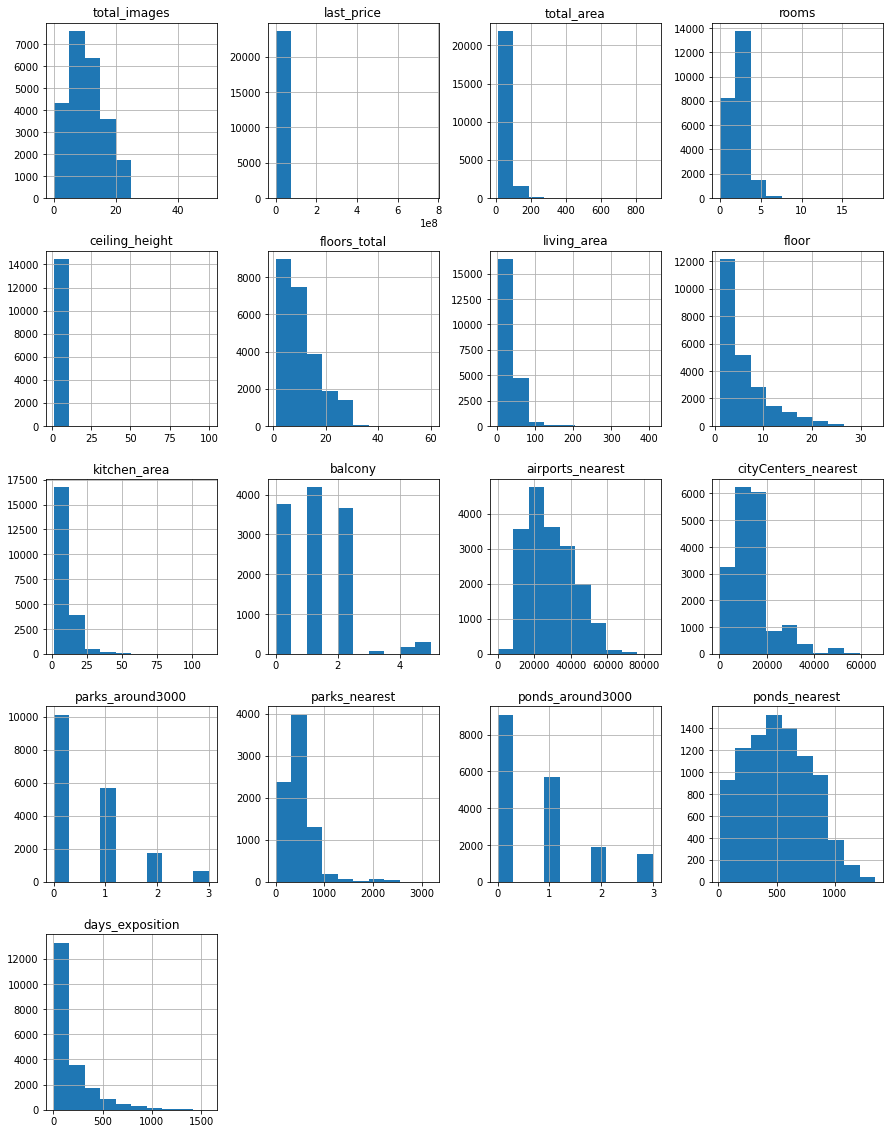

In [ ]:
data.hist(figsize=(15, 20));

**Вывод:** Изучили данные, посмотрели на распределние числовых колонок. В датасете 23699 строк и 22 колонки. Видим, что в датасете достаточно много пропусков, а также у некоторых столбцов неверный тип данных.

### Предобработка данных

In [ ]:
data.duplicated().sum()

0

Явных дубликатов нет

Определим колонки с пропусками

In [ ]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Возможные причины возникновения пропусков:
`airports_nearest`, `cityCenters_nearest`, `parks_around3000`, `parks_nearest`, `ponds_around3000`, `ponds_nearest` - картографические данные, можно отнести к технической ошибке. Возможно проблема с адресом, например, возникла ошибка при его определении, в результате чего значения не проставились автоматически; также могла произойти ошибка при выгрузке данных;

`days_exposition` - вероятно объявление не было размещено, либо сделка состоялась не на платформе создания объявления или забыли закрыть;

`ceiling_height`, `floors_total`, `is_apartment`, `kitchen_area`, `living_area`, `locality_name` - данные заполняются продавцом и вероятно, на момент формирования объявления продавец не обладал необходимой информацией;

`ceiling_height` - восстановим пустые строки медианными значениями;

`balcony` - скорее всего продавец имел ввиду отсутствие балконов, заменим на 0.

In [ ]:
data['balcony'] = data['balcony'].fillna(0)
data['balcony'].isna().sum()

0

In [ ]:
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median())
data['ceiling_height'].isna().sum()

0

Приведем колонку `first_day_exposition` к типу datetime, т.к для дальнейшего анализа потребуются отдельно год, месяц и день публикации объявления. Колонки `balcony`, `last_price` для удобства приведем к целочисленному типу

In [ ]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format= '%Y-%m-%d %H:%M')
data.astype({'balcony': 'int64', 'last_price': 'int64'})
data.tail()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
23694,9,9700000.0,133.81,2017-03-21,3,3.70,5.0,73.3,3,NaN,False,False,13.83,0.0,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3100000.0,59.00,2018-01-15,3,2.65,5.0,38.0,4,NaN,False,False,8.50,0.0,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11,2,2.65,3.0,29.7,1,NaN,False,False,NaN,0.0,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23697,13,11475000.0,76.75,2017-03-28,2,3.00,17.0,NaN,12,NaN,False,False,23.30,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0
23698,4,1350000.0,32.30,2017-07-21,1,2.50,5.0,12.3,1,NaN,False,False,9.00,0.0,поселок Новый Учхоз,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Посмотрим как записаны населенные пункты

In [ ]:
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

Заметили проблему с буквой е/ё, а также одинаковые названия поселок/поселок городского типа, заменим эти неявные дубликаты

In [ ]:
len(data['locality_name'].unique())

365

In [ ]:
data['locality_name'] = data['locality_name'].str.replace('ё', 'е')
data['locality_name'] = data['locality_name'].str.replace('поселок городского типа', 'поселок')
len(data['locality_name'].unique())

330

Посмотрим на редкие значения, не являются ли они ошибками

In [ ]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,23699.000000,23613.000000,21796.000000,23699.000000,21421.000000,23699.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.724358,10.673824,34.457852,5.892358,10.569807,0.591080,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,0.988298,6.597173,22.030445,4.885249,5.905438,0.959298,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.600000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,0.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.700000,16.000000,42.300000,8.000000,12.000000,1.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


Удалим строки в которых общая, жилая и площади кухни равны друг другу, это явная ошибка

In [ ]:
data = data.query('living_area != total_area')
data = data.query('living_area != kitchen_area')
data = data.query('total_area != kitchen_area')
data

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07,3,2.70,16.0,51.0,8,NaN,False,False,25.00,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04,1,2.65,11.0,18.6,1,NaN,False,False,11.00,2.0,поселок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20,2,2.65,5.0,34.3,4,NaN,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24,3,2.65,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19,2,3.03,14.0,32.0,13,NaN,False,False,41.00,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21,3,3.70,5.0,73.3,3,NaN,False,False,13.83,0.0,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3100000.0,59.00,2018-01-15,3,2.65,5.0,38.0,4,NaN,False,False,8.50,0.0,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11,2,2.65,3.0,29.7,1,NaN,False,False,NaN,0.0,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23697,13,11475000.0,76.75,2017-03-28,2,3.00,17.0,NaN,12,NaN,False,False,23.30,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0


По нормам СНиП минимальная площадь кухни состаляет 5 м², веоятно, в измерениях была допущена ошибка, чтобы не потерять данные, заменим площадь кухни в этих строках на 5 м²

In [ ]:
def kitchen(area):
    if area < 5:
      return 5
    else:
      return area  
data['kitchen_area'] = data['kitchen_area'].apply(kitchen)  

Посмотрим на количество комнат

In [ ]:
data['rooms'].value_counts()

1     8021
2     7932
3     5808
4     1180
5      326
0      195
6      105
7       59
8       12
9        8
10       3
11       2
14       2
15       1
19       1
16       1
12       1
Name: rooms, dtype: int64

Минимальное количество комнат 0, вероятно, предполагается, что это квартиры-студии. Очень малая доля квартир имеет более 6 комнат, удалим их

In [ ]:
data = data[~(data['rooms'] > 6)]
data['rooms'].value_counts()

1    8021
2    7932
3    5808
4    1180
5     326
0     195
6     105
Name: rooms, dtype: int64

Посмотрим на количество этажей

In [ ]:
data['floors_total'].value_counts().sort_values()

37.0       1
34.0       1
60.0       1
52.0       1
33.0       1
29.0       1
36.0       3
28.0      21
35.0      24
1.0       25
26.0     123
21.0     158
27.0     164
11.0     202
13.0     227
20.0     270
22.0     284
19.0     337
23.0     350
15.0     365
2.0      378
8.0      386
24.0     467
18.0     501
14.0     552
7.0      582
3.0      666
17.0     832
6.0      884
25.0    1072
10.0    1172
4.0     1185
12.0    1360
16.0    1373
9.0     3756
5.0     5756
Name: floors_total, dtype: int64

Видим, что в выборке здания выше 28 этажей являются достаточно редкими, удалим их

In [ ]:
data = data[~(data['floors_total'] > 28)]

Посмотрим на высоту потолков

In [ ]:
sorted(data['ceiling_height'].unique())

[2.4,
 2.45,
 2.46,
 2.47,
 2.48,
 2.49,
 2.5,
 2.51,
 2.52,
 2.53,
 2.54,
 2.55,
 2.56,
 2.57,
 2.58,
 2.59,
 2.6,
 2.61,
 2.62,
 2.63,
 2.64,
 2.65,
 2.66,
 2.67,
 2.68,
 2.69,
 2.7,
 2.71,
 2.72,
 2.73,
 2.74,
 2.75,
 2.76,
 2.77,
 2.78,
 2.79,
 2.8,
 2.81,
 2.82,
 2.83,
 2.84,
 2.85,
 2.86,
 2.87,
 2.88,
 2.89,
 2.9,
 2.91,
 2.92,
 2.93,
 2.94,
 2.95,
 2.96,
 2.97,
 2.98,
 2.99,
 3.0,
 3.01,
 3.02,
 3.03,
 3.04,
 3.05,
 3.06,
 3.07,
 3.08,
 3.09,
 3.1,
 3.11,
 3.12,
 3.13,
 3.14,
 3.15,
 3.16,
 3.17,
 3.18,
 3.2,
 3.21,
 3.22,
 3.23,
 3.24,
 3.25,
 3.26,
 3.27,
 3.28,
 3.3,
 3.31,
 3.32,
 3.33,
 3.34,
 3.35,
 3.36,
 3.37,
 3.38,
 3.39,
 3.4,
 3.42,
 3.44,
 3.45,
 3.46,
 3.47,
 3.48,
 3.49,
 3.5,
 3.51,
 3.52,
 3.53,
 3.54,
 3.55,
 3.56,
 3.57,
 3.58,
 3.59,
 3.6,
 3.62,
 3.63,
 3.65,
 3.66,
 3.67,
 3.68,
 3.69,
 3.7,
 3.75,
 3.76,
 3.78,
 3.8,
 3.82,
 3.83,
 3.84,
 3.85,
 3.86,
 3.87,
 3.88,
 3.9,
 3.93,
 3.95,
 3.98,
 4.0,
 4.06,
 4.1,
 4.14,
 4.15,
 4.19,
 4.2,
 4.25,
 4.3,
 4.37

Скорее всего, при значении 24 допустили опечатку и имели ввиду высоту потолка 2.4 метра, также и в других значениях больше 24. Избавимся от этой опечатки

In [ ]:
def height(number):
    if number >= 24.0:
      return number/10
    else:
      return number  
data['ceiling_height'] = data['ceiling_height'].apply(height)  

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


По нормам СНиП минимальная высота потолка составляет 2.4 метра. Выше 5 метров высота потолка тоже не может быть, даже с учетом двухэтажной квартиры. Скорее всего это ошибка замеров, либо опечатки, но что точно подразумевалось нам не известно, и мы не можем заменить на какое-то значение, поэтому избавимся от этих аномальных значений

In [ ]:
data = data[~((data['ceiling_height'] < 2.4) | (data['ceiling_height'] > 5))]
data

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07,3,2.70,16.0,51.0,8,NaN,False,False,25.00,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04,1,2.65,11.0,18.6,1,NaN,False,False,11.00,2.0,поселок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20,2,2.65,5.0,34.3,4,NaN,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24,3,2.65,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19,2,3.03,14.0,32.0,13,NaN,False,False,41.00,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21,3,3.70,5.0,73.3,3,NaN,False,False,13.83,0.0,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3100000.0,59.00,2018-01-15,3,2.65,5.0,38.0,4,NaN,False,False,8.50,0.0,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11,2,2.65,3.0,29.7,1,NaN,False,False,NaN,0.0,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23697,13,11475000.0,76.75,2017-03-28,2,3.00,17.0,NaN,12,NaN,False,False,23.30,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0


**Вывод:** Определили и заменили пропуски, там где это было возможно. Преобразовали данные к нужному типу. Избавились от неявных дубликатов, удалили редкие значения по количеству комнат, этажности дома и высоте потолков.

### Посчитайте и добавьте в таблицу новые столбцы

Добавим столбцы с ценой за 1 квадратный метр, с днем недели, месяцем и годом публикации, с расстоянием до центра города в км

In [ ]:
data['cost_per_meter'] = round((data['last_price']/data['total_area']), 2)
data['weekday'] = data['first_day_exposition'].dt.weekday 
data['month'] = data['first_day_exposition'].dt.month
data['year'] = data['first_day_exposition'].dt.year
data['city_center_km'] = round(data['cityCenters_nearest']/1000)
data['last_price'] = data['last_price']/1000000

Создадим функцию для категоризации этажа

In [ ]:
def floor(number):
      if number['floor'] == 1:
        return "Первый"
      elif number['floor'] == number['floors_total']:
        return "Последний"
      else:
        return "Другой"  

In [ ]:
data['floor_category'] = data.apply(floor, axis=1)
data.tail(15)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,cost_per_meter,weekday,month,year,city_center_km,floor_category
23684,20,21.400,145.00,2018-11-02,4,3.00,26.0,71.4,17,NaN,False,False,15.60,0.0,Санкт-Петербург,11827.0,11459.0,0.0,NaN,0.0,NaN,NaN,147586.21,4,11,2018,11.0,Другой
23685,15,2.490,31.00,2019-01-24,1,2.50,5.0,17.3,5,NaN,False,False,5.60,1.0,Ломоносов,48393.0,51818.0,0.0,NaN,0.0,NaN,NaN,80322.58,3,1,2019,52.0,Последний
23686,8,3.300,31.00,2017-04-29,1,2.55,9.0,18.0,6,NaN,False,False,6.50,0.0,Санкт-Петербург,11751.0,11602.0,1.0,140.0,1.0,317.0,193.0,106451.61,5,4,2017,12.0,Другой
23687,6,3.200,39.00,2017-12-16,1,2.65,9.0,20.0,6,NaN,False,False,11.00,2.0,Санкт-Петербург,40837.0,16704.0,0.0,NaN,0.0,NaN,38.0,82051.28,5,12,2017,17.0,Другой
23688,19,9.200,101.00,2019-04-01,3,3.05,15.0,63.0,12,NaN,False,False,15.00,0.0,Санкт-Петербург,15632.0,14428.0,0.0,NaN,0.0,NaN,23.0,91089.11,0,4,2019,14.0,Другой
23689,13,3.550,35.30,2018-02-28,1,2.86,15.0,16.3,4,NaN,False,False,9.10,2.0,Санкт-Петербург,17284.0,16081.0,1.0,353.0,2.0,652.0,29.0,100566.57,2,2,2018,16.0,Другой
23690,3,5.500,52.00,2018-07-19,2,2.65,5.0,31.0,2,NaN,False,False,6.00,0.0,Санкт-Петербург,20151.0,6263.0,1.0,300.0,0.0,NaN,15.0,105769.23,3,7,2018,6.0,Другой
23691,11,9.470,72.90,2016-10-13,2,2.75,25.0,40.3,7,NaN,False,False,10.60,1.0,Санкт-Петербург,19424.0,4489.0,0.0,NaN,1.0,806.0,519.0,129903.98,3,10,2016,4.0,Другой
23692,2,1.350,30.00,2017-07-07,1,2.65,5.0,17.5,4,NaN,False,False,6.00,0.0,Тихвин,NaN,NaN,NaN,NaN,NaN,NaN,413.0,45000.00,4,7,2017,NaN,Другой
23693,9,4.600,62.40,2016-08-05,3,2.60,9.0,40.0,8,NaN,False,False,8.00,0.0,Петергоф,45602.0,34104.0,1.0,352.0,1.0,675.0,239.0,73717.95,4,8,2016,34.0,Другой


**Вывод:** для дальнейшего исследования в таблицу были добавлены новые столбцы 

### Проведите исследовательский анализ данных

Подробнее изучим распределение параметров данных

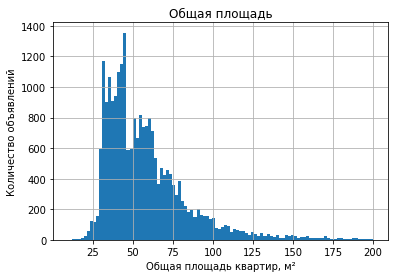

In [ ]:
data.hist('total_area', grid=True, bins=100, range=(10,200))
plt.title('Общая площадь')
plt.xlabel('Общая площадь квартир, м²')
plt.ylabel('Количество объявлений');

Очень малое количество квартир площадью до 30 м², большинство квартир имеют площадь до 45 м². После 65 м² количество квартир снижается

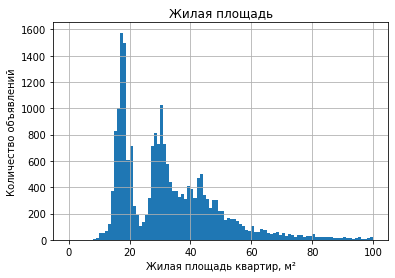

In [ ]:
data.hist('living_area', grid=True, bins=100, range=(0,100))
plt.title('Жилая площадь')
plt.xlabel('Жилая площадь квартир, м²')
plt.ylabel('Количество объявлений');

Преобладают квартиры жилой площадью 18-20 м², достаточно много квартир жилой площадью около 30 м²

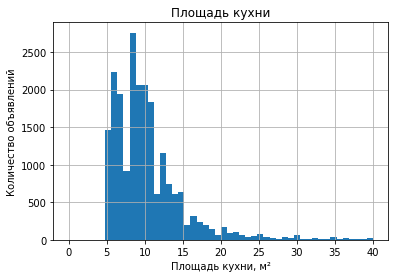

In [ ]:
data.hist('kitchen_area', grid=True, bins=50, range=(0, 40))
plt.title('Площадь кухни')
plt.xlabel('Площадь кухни, м²')
plt.ylabel('Количество объявлений');

Преобладают кухни, площадью около 7 м²

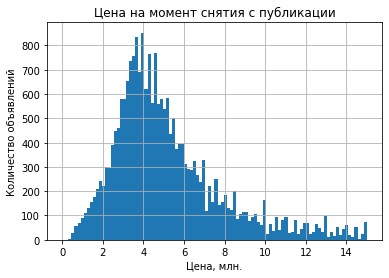

In [ ]:
data.hist('last_price', grid=True, bins=100, range=(0,15))
plt.title('Цена на момент снятия с публикации')
plt.xlabel('Цена, млн.')
plt.ylabel('Количество объявлений');

Пик стоимости квартир наблюдается в районе 4 млн., затем идет спад

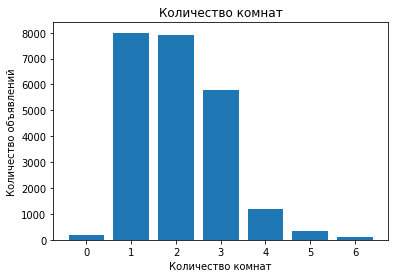

In [ ]:
plt.bar(data['rooms'].value_counts().index, data['rooms'].value_counts().values)
plt.title('Количество комнат')
plt.xlabel('Количество комнат')
plt.ylabel('Количество объявлений');

У большинства квартир 1, 2 или 3 комнаты

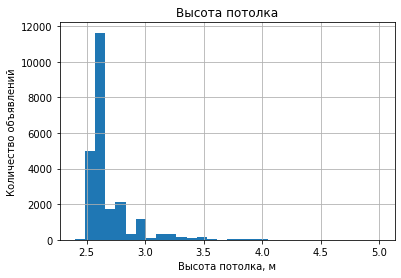

In [ ]:
data.hist('ceiling_height', grid=True, bins=30)
plt.title('Высота потолка')
plt.xlabel('Высота потолка, м')
plt.ylabel('Количество объявлений');

В квартирах преобладает высота потолков в 2.65 м

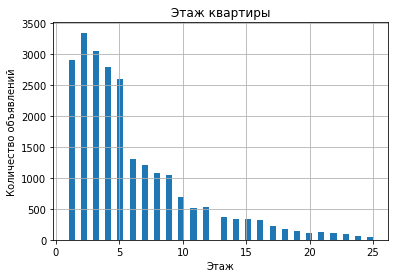

In [ ]:
data.hist('floor', grid=True, bins=50, range=(1,25))
plt.title('Этаж квартиры')
plt.xlabel('Этаж')
plt.ylabel('Количество объявлений');

Наибольшее количество квартир расположено на 2 и 3 этажах

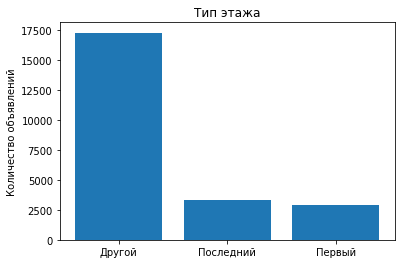

In [ ]:
plt.bar(data['floor_category'].value_counts().index, data['floor_category'].value_counts().values)
plt.title('Тип этажа')
plt.ylabel('Количество объявлений');

Количество квартир на первом и на последнем этаже примерно одинаковое, но основная доля квартир на других этажах

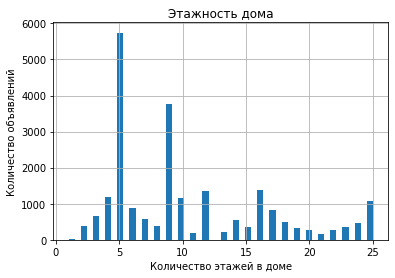

In [ ]:
data.hist('floors_total', grid=True, bins=50, range=(1,25))
plt.title('Этажность дома')
plt.xlabel('Количество этажей в доме')
plt.ylabel('Количество объявлений');

В объявлениях преобладают квартиры в 5-ти и 9-ти этажных зданиях

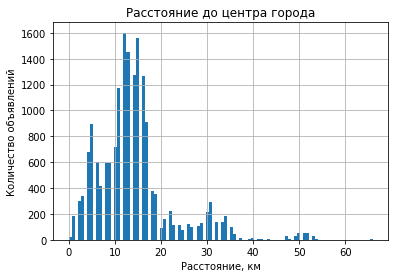

In [ ]:
data.hist('city_center_km', grid=True, bins=100)
plt.title('Расстояние до центра города')
plt.xlabel('Расстояние, км')
plt.ylabel('Количество объявлений');

Большинство квартир расположены в 10-16 км от центра города

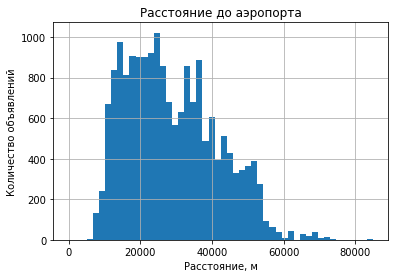

In [ ]:
data.hist('airports_nearest', grid=True, bins=50)
plt.title('Расстояние до аэропорта')
plt.xlabel('Расстояние, м')
plt.ylabel('Количество объявлений');

Большинство квартир удалены от аэропорта примерно на 25 км

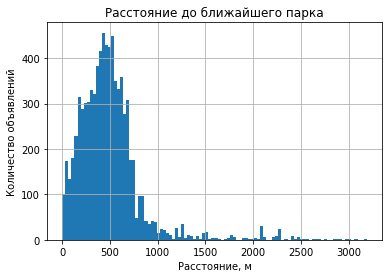

In [ ]:
data.hist('parks_nearest', grid=True, bins=100)
plt.title('Расстояние до ближайшего парка')
plt.xlabel('Расстояние, м')
plt.ylabel('Количество объявлений');

Растояние до ближайших парков у большинства квартир около 500 м

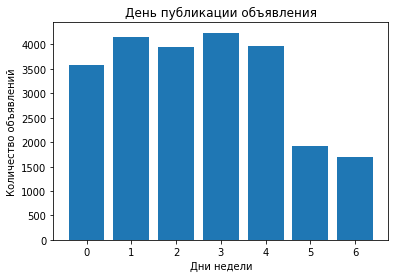

In [ ]:
plt.bar(data['weekday'].value_counts().index, data['weekday'].value_counts().values)
plt.title('День публикации объявления')
plt.xlabel('Дни недели')
plt.ylabel('Количество объявлений');

Видим, что в выходные дни было опубликовано гораздо меньше объявлений, чем в будни

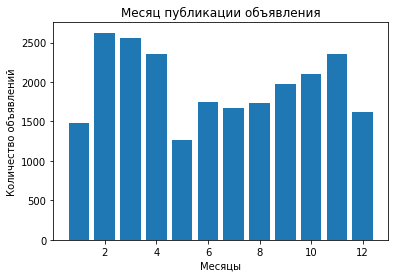

In [ ]:
plt.bar(data['month'].value_counts().index, data['month'].value_counts().values)
plt.title('Месяц публикации объявления')
plt.xlabel('Месяцы')
plt.ylabel('Количество объявлений');

Наблюдается снижение публикации объявлений в январе и в мае, скорее всего, это связвно с праздниками (в эти месяцы самые длинные выходные дни, а как мы видели ранее, в выходные дни публикуется гораздо меньше объявлений)

Изучим время продажи квартир

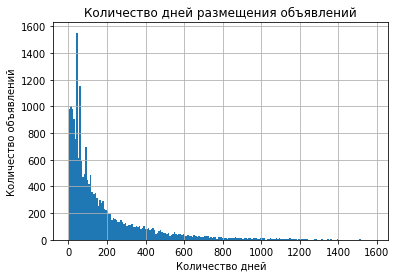

In [ ]:
data.hist('days_exposition', grid=True, bins=200)
plt.title('Количество дней размещения объявлений')
plt.xlabel('Количество дней')
plt.ylabel('Количество объявлений');

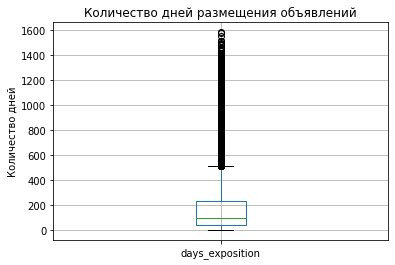

In [ ]:
data.boxplot('days_exposition')
plt.title('Количество дней размещения объявлений')
plt.ylabel('Количество дней');

In [ ]:
data['days_exposition'].describe()

count    20369.000000
mean       180.652413
std        219.522475
min          1.000000
25%         45.000000
50%         95.000000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64

Медианное количество дней продажи составляет 95, но в среднем, квартиру продают за 180 дней, так происходит из-за большого количества выбросов в выборке. Достаточно быстрыми сделками млжно считать продажи, совершенные менее, чем за 45 дней (за это время продаются менее 25% выборки). Согласно диаграме размаха, сделки, совершенные более чем за 510 дней, выходят за пределы нормальных значений и их можно считать очень долгими (3 квартиль + 1.5 межквартильных размаха = 231 + 1.5х(231-45) = 510)

На гисторамме заметны пиковые значения, рассмотрим их подробнее

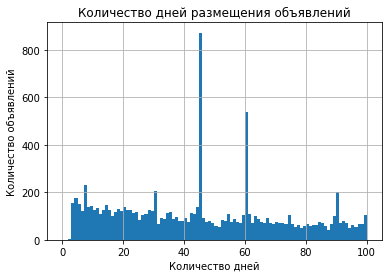

In [ ]:
data.hist('days_exposition', grid=True, bins=100, range=(0,100))
plt.title('Количество дней размещения объявлений')
plt.xlabel('Количество дней')
plt.ylabel('Количество объявлений');

Пики наблюдаются на 45, 60 , 90, 7 и 30 днях. Скорее всего, это техические настройки сервиса размещения объявления, т.е после этих дней, если пользователь не продлеал объявление, оно автоматически закрывалось.

Рассмотрим от чего зависит стоимость квартир

0.68


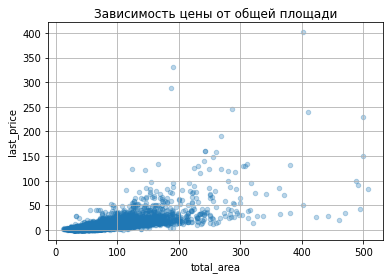

In [ ]:
print(data['last_price'].corr(data['total_area']).round(2))
data.plot(x='total_area', y='last_price', kind='scatter', grid=True, alpha=0.3)
plt.title('Зависимость цены от общей площади');

0.58


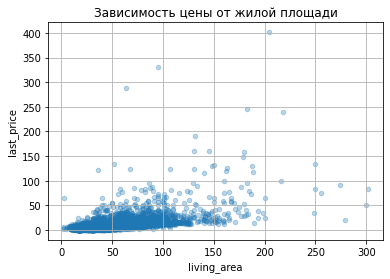

In [ ]:
print(data['last_price'].corr(data['living_area']).round(2))
data.plot(x='living_area', y='last_price', kind='scatter', grid=True, alpha=0.3)
plt.title('Зависимость цены от жилой площади');

0.5


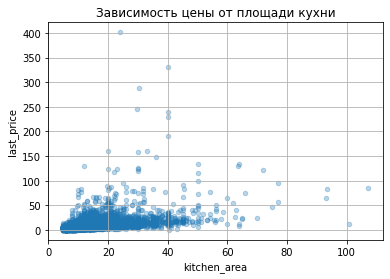

In [ ]:
print(data['last_price'].corr(data['kitchen_area']).round(2))
data.plot(x='kitchen_area', y='last_price', kind='scatter', grid=True, alpha=0.3)
plt.title('Зависимость цены от площади кухни');

Видим, что зависимость цены от площадей схожая, и коэффициент корреляции составляет 0.68, 0.58 и 0.5 для общей, жилой и площади кухни соответственно

0.37


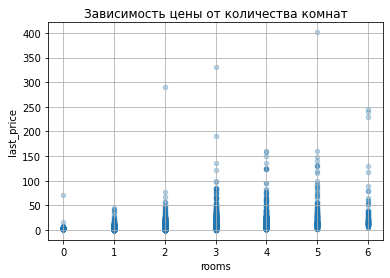

In [ ]:
print(data['last_price'].corr(data['rooms']).round(2))
data.plot(x='rooms', y='last_price', kind='scatter', grid=True, alpha=0.3)
plt.title('Зависимость цены от количества комнат');

Чем больше комнат в квартире, тем больше ее стоимость, ранее мы видели, что с увеличением площади увеличивается стоимость квартиры. Логично, что с увеличением площади увеличивается и количество комнат, но коэффициент корреляции уже меньше.

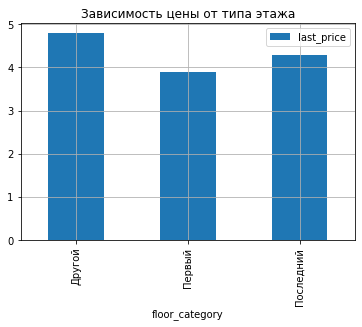

In [ ]:
data.pivot_table(index='floor_category', values='last_price', aggfunc='median').plot(kind='bar', grid=True)
plt.title('Зависимость цены от типа этажа');

Квартиры, расположенные на первом этаже самые дешевые, на последнем этаже квартиры дороже, и самые дорогие квартиры на других этажах

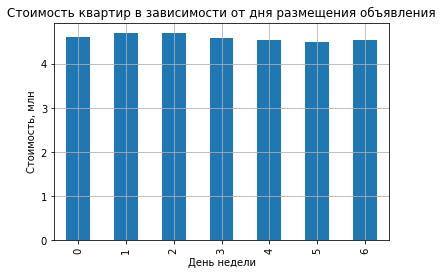

In [ ]:
data.pivot_table(index='weekday', values='last_price', aggfunc=['median']).plot(kind='bar', legend=False, grid=True)
plt.title('Стоимость квартир в зависимости от дня размещения объявления')
plt.xlabel('День недели')
plt.ylabel('Стоимость, млн');

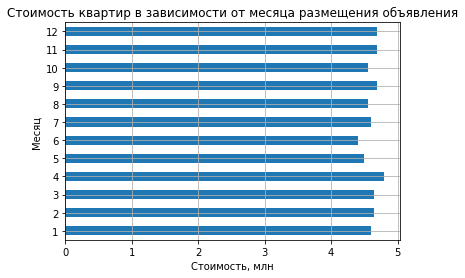

In [ ]:
data.pivot_table(index='month', values='last_price', aggfunc=['median']).plot(kind='barh', legend=False, grid=True)
plt.title('Стоимость квартир в зависимости от месяца размещения объявления')
plt.xlabel('Стоимость, млн')
plt.ylabel('Месяц');

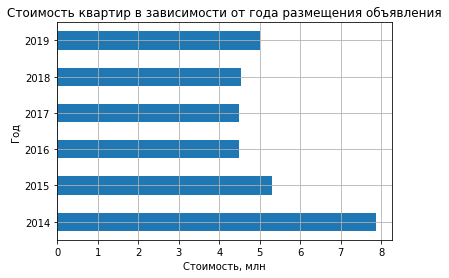

In [ ]:
data.pivot_table(index='year', values='last_price', aggfunc=['median']).plot(kind='barh', legend=False, grid=True)
plt.title('Стоимость квартир в зависимости от года размещения объявления')
plt.xlabel('Стоимость, млн')
plt.ylabel('Год');

День публикации объявления никак не влияет на стоимость квартиры. По месяцу есть незначительные колебания, в июне видим снижение цен, вероятно, это обуславливается началом отпусков, многие уезжают из города, спрос падает, цены снижаются. По году размещения замечаем снижение цен после 2014 года, однако с 2018 года цены начинают повышаться.

Определим 10 населенных пунктов с наибольшим количеством объявлений и посчитаем стреднюю стоимость квадратного метра

In [ ]:
cost_per_meter = data.pivot_table(index='locality_name', values='cost_per_meter', aggfunc=['mean', 'count'])
cost_per_meter.columns = ['mean_cost_per_meter', 'count_of_ads']
cost_per_meter = cost_per_meter.sort_values(by='count_of_ads', ascending=False).head(10)
cost_per_meter

,mean_cost_per_meter,count_of_ads
locality_name,,
Санкт-Петербург,114461.828703,15554
поселок Мурино,85615.599112,552
поселок Шушары,78677.605626,439
Всеволожск,68719.320378,397
Пушкин,102948.577330,367
Колпино,75333.295816,337
поселок Парголово,90237.614118,323
Гатчина,68746.146515,307
деревня Кудрово,92473.547559,299


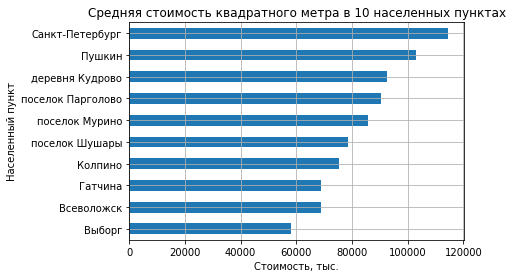

In [ ]:
cost_per_meter.drop('count_of_ads', axis=1).sort_values(by='mean_cost_per_meter').plot(kind='barh', legend=False, grid=True)
plt.title('Средняя стоимость квадратного метра в 10 населенных пунктах')
plt.xlabel('Стоимость, тыс.')
plt.ylabel('Населенный пункт');

Самая высокая стоимость за квадратный метр в Санкт-Петербурге, чуть дешевле в Пушкине. Наиболее низкая стоимость квадратного метра из населенных пунктов с наибольшим количеством объявлений - в Выборге

Посмотим как влияет расстояние до центра города на стоимость квартир

In [ ]:
spb_center = data[data['locality_name'] == 'Санкт-Петербург']
pivot_spb_center = spb_center.pivot_table(index='city_center_km', values='cost_per_meter', aggfunc=['mean', 'median'])
pivot_spb_center

,mean,median
,cost_per_meter,cost_per_meter
city_center_km,,
0.0,245163.431600,155529.950
1.0,177834.666902,128485.110
2.0,158927.171225,123675.430
3.0,121434.290089,108401.640
4.0,130352.095356,118079.505
5.0,140345.051723,127700.670
6.0,150035.537917,131905.240
7.0,155889.254351,126226.360


-0.3


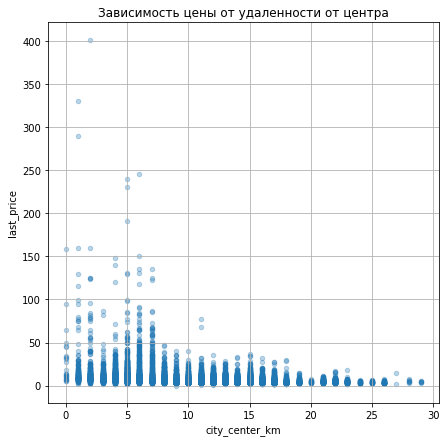

In [ ]:
print(spb_center['last_price'].corr(spb_center['city_center_km']).round(2))
spb_center.plot(x='city_center_km', y='last_price', kind='scatter', grid=True, alpha=0.3, figsize=(7,7))
plt.title('Зависимость цены от удаленности от центра');

Видим, что есть небольшая отрицательная зависимость, это говорит о том, что чем больше километров от центра, тем дешевле стоимость квартиры. Так же как и стоимость квадратного метра уменьшается с отдаленностью от центра. Судя по диаграме, на 8 километре заканчивается центр города, т.к видно значительное снижение цены

**Вывод:** в выборке преобладают квартиры с 1-3 комнатами, преимущественно находящиеся на 1-5 этажах, размещенные в 5-ти и 9-ти этажных зданиях. Заметили, что по выходным публикуется гораздо меньше объявлений. Половина квартир была продана менее чем за 95 дней. После 2014 года цены на квартиры снизились, но в 2018 начали повышаться. Самая высокая цена за квадратный метр в Санкт-Петербурге, наиболее низкая в Выборге. Выяснили, что при большем удалении от центра Санкт-Петербурга (после 8 км) стоимость квартиры уменьшается.

### Общий вывод

В работе был проанализирован предоставленный датасет сервиса Яндекс.Недвижимость. Датасет изучили, определили пропущенные значения, выяснили причины, по которым могли возникнуть пропуски в данных. Данные предварительно подготовили: удалили редкие значения и аномалии, выбивающиеся из общих данных, избавились от неявных дубликатов, преобразовали данные к нужному типу, где было возможно - заполнили пропущенные значения. Дополнительно было добавлено несколько колонок. Более подробно изучили параметры, посмотрели какие квартиры фигурируют в выборке, увидели, что большинство квартир:
* имеют 1-3 комнаты;
* стоимостью 3-5 млн. рублей;
* расположены на 1-5 этажах;
* находятся в 5-ти и 9-ти этажных домах;
* удалены от центра на 9-16 км;
* в среднем, продаются за 180 дней.

Выяснили, влияние даты размещения объявления:
* в выходные и праздничные дни публикуется меньше объявлений;
* квартиры, размещенные в июне наиболее дешевые;
* с 2014 года заметен спад стоимости квартир, но с 2018 года снова идет повышение цен;
* в зависимости от дня недели размещения объявлений значительных колебаний нет.

Выявили от каких параметров в той или иной степени зависит стоимость квартир:
* увидели, что чем больше площадь (общая, жилая и кухни), тем выше стоимость квартиры, чуть меньшее влияние оказывет количество комнат;
* на первом и последнем этажах квартиры дешевле, чем на других;
* самые дорогие квартире в Санкт-Петербурге; 
* определили центр Санкт-Петербурга и уведели, что при удалении более чем на 8 км от центра, стоимость квартиры становится дешевле.